## 2. Fundamental_Backtest
利用基本面数据选出价值股后，如果MA最近三天涨则买入，否则卖出。

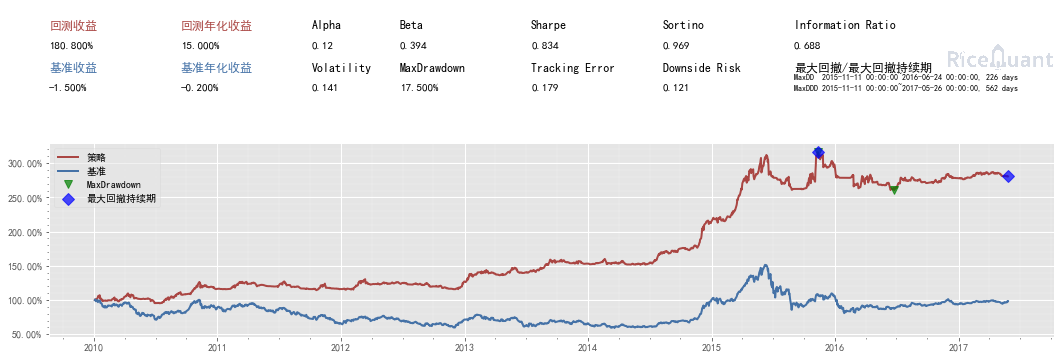

In [1]:
#coding=utf-8
# run_code_demo
from rqalpha import run_code

code = """
import numpy as np
import talib as ta
import pandas as pd
import os
import rqalpha
from rqalpha.api import *

def init(context):
    codes = pd.read_excel('D:/PycharmProjects/Quant_Alpha/Data_Manager/Valuation_Selection/Value_Selection.xlsx')
    codes.index = codes.pop('date')
    context.codes = codes
    scheduler.run_weekly(find_pool, tradingday=1)


def find_pool(context, bar_dict):
    codes = context.codes.loc[context.now]
    stocks = codes.index[codes == True]
    context.stocks = stocks

def handle_bar(context, bar_dict):
    sell(context)
    pool = context.stocks
    if pool is not None:
        stocks_len = len(pool)

        for stocks in context.portfolio.positions:
            if stocks not in pool:
                order_target_percent(stocks, 0)
        result = []
        for codes in pool:
            data_c = history_bars(codes, 25, '1d', 'close', adjust_type='post')
            ma = ta.EMA(data_c, timeperiod=20)
            if len(ma)>3:
                if ma[-1] > ma[-2] and ma[-2] > ma[-3] and codes not in result and codes not in context.portfolio.positions:
                    result.append(codes)
        if len(result):
            for r in result:
                order_target_percent(r, 1.0/stocks_len)

def sell(context):
    sell_list = []
    for stocks in context.portfolio.positions:
        data_c = history_bars(stocks, 25, '1d', 'close', adjust_type='post')
        ma = ta.EMA(data_c, timeperiod=20)
        ma_s = ta.EMA(data_c, timeperiod=10)
        if len(ma)>3:
            if ma[-1] < ma[-2] and ma[-2] < ma[-3]:
                sell_list.append(stocks)
    if len(sell_list):
        for s in sell_list:
            order_target_percent(s, 0)


"""

config = {
    "base": {
        "start_date": "2010-01-04",
        "end_date": "2017-05-30",
        "frequency": '1d',
        "securities": ['stock'],
        "stock_starting_cash": 10000000,
        "benchmark": "000300.XSHG"
    },
    "extra": {
        "log_level": "verbose",
    },
    "mod": {
        "sys_analyser": {
            "enabled": True,
            "plot": True
        }
    }
}

run_code(code, config)
